In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/datasets/roger1315/automobiles?resource=download
am_df = pd.read_csv('data/auto-mpg.csv')
am_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [19]:
am_df.shape

(398, 9)

In [20]:
am_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [21]:
am_df = am_df.replace('?', np.nan)
am_df = am_df.dropna()
am_df.shape

(392, 9)

In [22]:
am_df.drop(columns=['car name', 'origin'], inplace=True)
am_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
213,13.0,8,350.0,145,4055,12.0,76
334,23.7,3,70.0,100,2420,12.5,80
295,35.7,4,98.0,80,1915,14.4,79
254,20.2,6,200.0,85,2965,15.8,78
184,25.0,4,140.0,92,2572,14.9,76


In [23]:
am_df['model year'] = '19' + am_df['model year'].astype(str)
am_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
98,16.0,6,250.0,100,3278,18.0,1973
21,24.0,4,107.0,90,2430,14.5,1970
296,27.4,4,121.0,80,2670,15.0,1979
205,28.0,4,97.0,75,2155,16.4,1976
333,32.7,6,168.0,132,2910,11.4,1980


In [24]:
import datetime

am_df['age'] =  datetime.datetime.now().year - am_df['model year'].astype(int)
am_df.drop(columns=['model year'], inplace=True)
am_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
191,22.0,6,225.0,100,3233,15.4,49
363,22.4,6,231.0,110,3415,15.8,44
308,33.5,4,151.0,90,2556,13.2,46
170,23.0,4,140.0,78,2592,18.5,50
109,21.0,4,140.0,72,2401,19.5,52


In [25]:
am_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [32]:
am_df['horsepower'] = am_df['horsepower'].astype(float)
am_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
age               int64
dtype: object

Text(0.5, 1.0, 'age of the car vs. MPG')

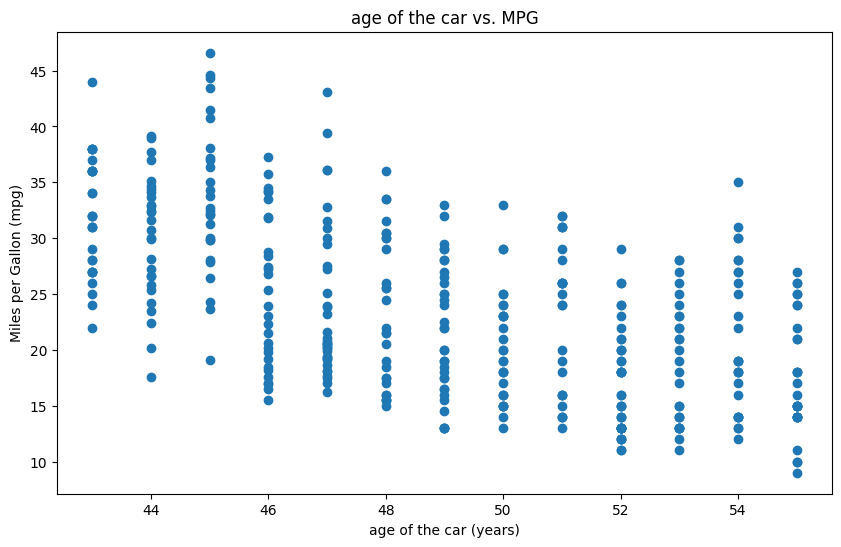

In [27]:
plt.subplots(figsize=(10, 6))
plt.scatter(am_df['age'], am_df['mpg'])
plt.xlabel('age of the car (years)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('age of the car vs. MPG')

Text(0.5, 1.0, 'Acceleration vs. MPG')

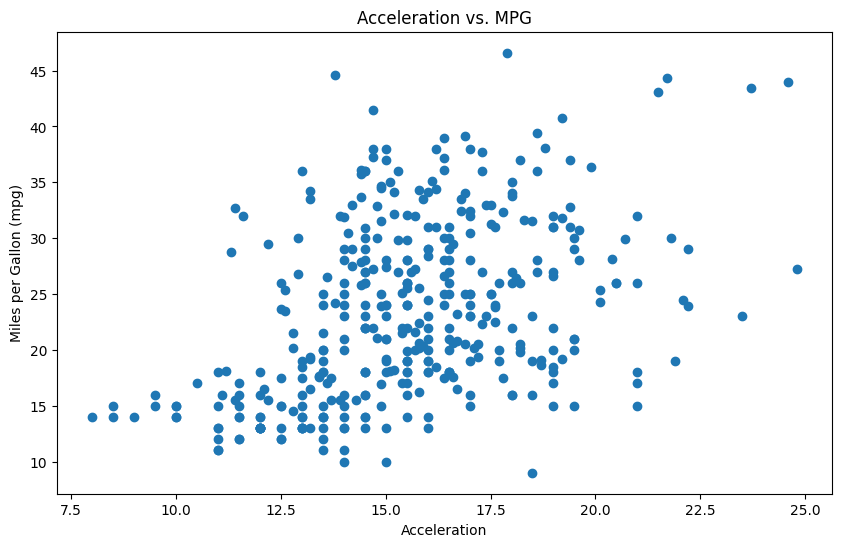

In [28]:
plt.subplots(figsize=(10, 6))
plt.scatter(am_df['acceleration'], am_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Acceleration vs. MPG')

Text(0.5, 1.0, 'Weight vs. MPG')

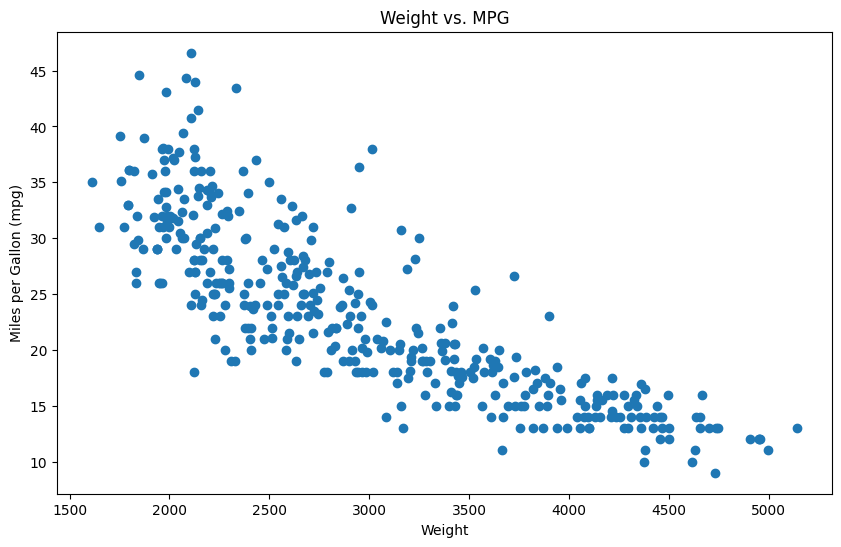

In [29]:
plt.subplots(figsize=(10, 6))
plt.scatter(am_df['weight'], am_df['mpg'])
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Weight vs. MPG')

Text(0.5, 1.0, 'Horsepower vs. MPG')

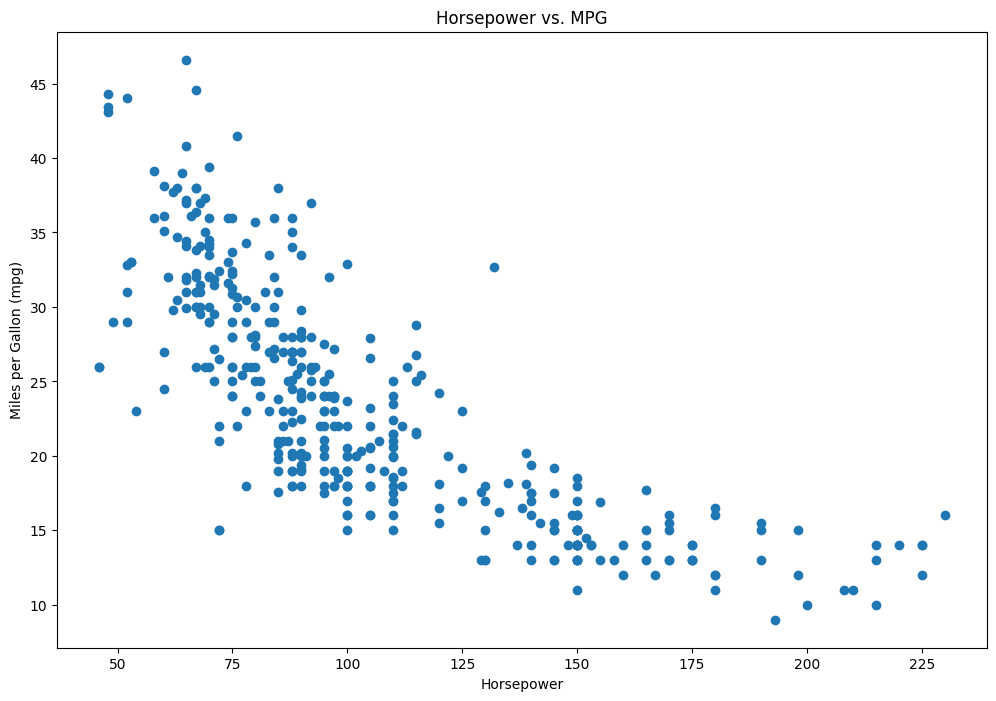

In [33]:
plt.subplots(figsize=(12, 8))
plt.scatter(am_df['horsepower'], am_df['mpg'])
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Horsepower vs. MPG')

In [34]:
am_df_corr = am_df.corr()
am_df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

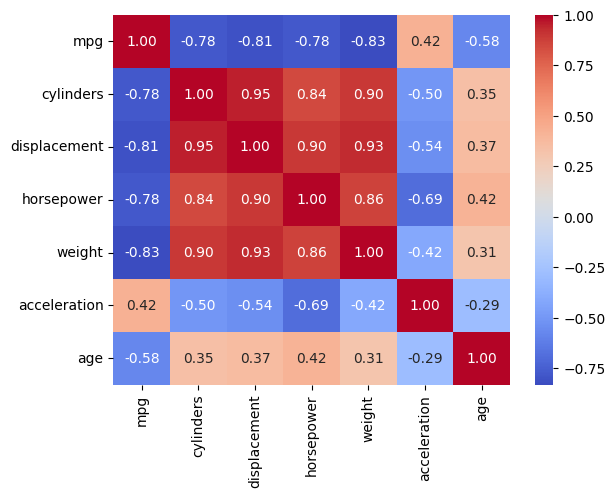

In [35]:
sns.heatmap(am_df_corr, annot=True, cmap='coolwarm', fmt='.2f')

In [36]:
am_df = am_df.sample(frac=1).reset_index(drop=True)
am_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,14.0,8,351.0,153.0,4129,13.0,53
1,26.0,4,108.0,93.0,2391,15.5,51
2,27.0,4,151.0,90.0,2735,18.0,43
3,16.0,6,250.0,100.0,3781,17.0,51
4,13.0,8,400.0,170.0,4746,12.0,54


In [37]:
am_df = am_df.to_csv('data/auto-mpg-cleaned.csv', index=False)